El índice global de felicidad es una publicación anual de la Red de Soluciones
para el Desarrollo Sostenible de las Naciones Unidas (UN SDSN). Contiene articulos
y rankings de felicidad nacional basado en las respuestas de personas encuestadas
sobre sus vidas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Obtener los datos

In [2]:
H15 = pd.read_csv("data/2015.csv")
H16 = pd.read_csv("data/2016.csv")
H17 = pd.read_csv("data/2017.csv")
H18 = pd.read_csv("data/2018.csv")
H19 = pd.read_csv("data/2019.csv")
H20 = pd.read_csv("data/2020.csv")

In [3]:
H15["Year"] = 2015
H16["Year"] = 2016
H17["Year"] = 2017
H18["Year"] = 2018
H19["Year"] = 2019
H20["Year"] = 2020

## Limpieza

In [4]:
H15.drop(["Standard Error"], axis=1, inplace=True)
H16.drop(["Lower Confidence Interval", "Upper Confidence Interval"], 
          axis=1, inplace=True)

In [5]:
CoRe = H15.groupby("Country")["Region"].apply(list).to_dict()

In [6]:
CoRe.update(H16.groupby("Country")["Region"].apply(list).to_dict())

In [7]:
for key, value in CoRe.items():
    if type(value)==list:
        CoRe[key] = value[0]
    elif value:
        CoRe[key] = value

In [8]:
set(CoRe.values())

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

In [9]:
H16["Region"] = H16["Country"].map(CoRe)

In [10]:
H17["Region"] = H16["Country"].map(CoRe)

In [11]:
H17.rename(columns={"Happiness.Rank":"Happiness Rank", 
                    "Happiness.Score":"Happiness Score",
                    "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                    "Health..Life.Expectancy.":"Health (Life Expectancy)",
                    "Trust..Government.Corruption.":"Trust (Government Corruption)",
                    "Dystopia.Residual":"Dystopia Residual"
                    }, inplace=True)

In [12]:
H17.drop(["Whisker.high", "Whisker.low"], axis=1, inplace=True)

In [13]:
H18.rename(columns={"Country or region":"Country",
                    "Overall rank":"Happiness Rank",
                    "Score":"Happiness Score",
                    "GDP per capita":"Economy (GDP per Capita)",
                    "Healthy life expectancy":"Health (Life Expectancy)",
                    "Freedom to make life choices":"Freedom",
                    "Perceptions of corruption":"Trust (Government Corruption)"
                    }, inplace=True)

In [14]:
H18["Country"].replace(["Northern Cyprus", "Trinidad & Tobago"], 
                       ["North Cyprus","Trinidad and Tobago"],
                       inplace=True)
H18["Region"] = H18["Country"].map(CoRe)

In [15]:
for key, value in CoRe.items():
    if type(value)==list:
        CoRe[key] = value[0]
    elif value:
        CoRe[key] = value

In [16]:
H19.rename(columns={"Overall rank":"Happiness Rank",
                    "Country or region":"Country",
                    "Score":"Happiness Score",
                    "GDP per capita":"Economy (GDP per Capita)",
                    "Healthy life expectancy":"Health (Life Expectancy)",
                    "Freedom to make life choices":"Freedom",
                    "Perceptions of corruption":"Trust (Government Corruption)"
                    }, inplace=True)

In [17]:
CoRe.update({"Gambia":"Middle East and Northern Africa"})

In [18]:
len(set(CoRe.values()))

10

In [19]:
H19["Country"].replace(["Northern Cyprus", "Trinidad & Tobago","North Macedonia"], 
                       ["North Cyprus","Trinidad and Tobago","Macedonia"],
                       inplace=True)
H19["Region"] = H19["Country"].map(CoRe)

In [20]:
H20.drop(["upperwhisker", "lowerwhisker", 
          "Standard error of ladder score",
          "Ladder score in Dystopia"], axis=1, inplace=True)

In [21]:
H20.drop(["Logged GDP per capita", "Explained by: Social support",
          "Explained by: Healthy life expectancy",
          "Explained by: Freedom to make life choices",
          "Explained by: Generosity",
          "Explained by: Perceptions of corruption"
         ], axis=1, inplace=True)

In [22]:
H20.rename(columns={"Country name":"Country",
                    "Regional indicator":"Region",
                    "Ladder score":"Happiness Score",
                    "Freedom to make life choices":"Freedom",
                    "Perceptions of corruption":"Trust (Government Corruption)",
                    "Dystopia + residual":"Dystopia Residual",
                    "Healthy life expectancy":"Health (Life Expectancy)",
                    "Explained by: Log GDP per capita":"Economy (GDP per Capita)"
                   }, inplace=True)

In [23]:
H20["Trust (Government Corruption)"] = 1 - H20["Trust (Government Corruption)"]

In [24]:
H20["Happiness Rank"] = H20.index + 1

In [25]:
H20["Health (Life Expectancy)"] = H20["Health (Life Expectancy)"]/100

In [207]:
Happiness = pd.concat([H15,H16,H17,H18,H19,H20])
Happiness.isnull().sum()

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                           465
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
Year                               0
Social support                   470
dtype: int64

In [208]:
Happiness["Country"].replace(["Hong Kong S.A.R., China", "Hong Kong S.A.R. of China"], 
                       "Hong Kong",
                       inplace=True)

In [209]:
Happiness["Country"].replace(["Somaliland Region", "Somaliland region"], 
                       "Somalia",
                       inplace=True)

In [210]:
Happiness["Country"].replace(["Taiwan Province of China"], 
                       "Taiwan",
                       inplace=True)

In [230]:
Happiness["Health (Life Expectancy)"] = Happiness["Health (Life Expectancy)"]*100

In [211]:
Happiness['Dystopia Residual'] =\
    Happiness['Dystopia Residual'].fillna(Happiness.groupby('Country')
                                          ['Dystopia Residual'].transform('mean'))
Happiness['Trust (Government Corruption)'] =\
    Happiness['Trust (Government Corruption)'].fillna(Happiness.groupby('Country')
                                          ['Trust (Government Corruption)'].transform('mean'))
Happiness['Social support'] =\
    Happiness['Social support'].fillna(Happiness.groupby('Country')
                                       ['Social support'].transform('mean'))
Happiness['Family'] =\
    Happiness['Family'].fillna(Happiness.groupby('Country')
                               ['Family'].transform('mean'))

In [212]:
for index, value in Happiness["Region"].iteritems():
    if type(value) == list:
        Happiness.loc[index, "Region"] = value[0]

In [213]:
Happiness['Social support'] =\
    Happiness['Social support'].fillna(Happiness.groupby('Region')
                                       ['Social support'].transform('mean'))
Happiness['Family'] =\
    Happiness['Family'].fillna(Happiness.groupby('Region')
                               ['Family'].transform('mean'))

In [214]:
CoRe.update({"Maldives":"Southern Asia"})

In [215]:
Happiness["Region"] = Happiness["Country"].map(CoRe)

In [216]:
Happiness.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Social support
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,78.420321,5.394436,0.908311,0.989542,0.617658,0.472008,0.148801,0.180425,2.060878,2017.485561,1.080953
std,45.021905,1.124935,0.402023,0.297888,0.229147,0.201962,0.130846,0.153977,0.539708,1.708260,0.279657
min,1.000000,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.257241,2015.000000,0.000000
25%,39.500000,4.540000,0.600264,0.812920,0.500955,0.337772,0.061079,0.098152,1.739470,2016.000000,0.874162
50%,78.000000,5.353500,0.974380,1.032809,0.653133,0.465820,0.106285,0.183000,2.071238,2017.000000,1.105000
75%,117.000000,6.198500,1.228785,1.221453,0.779015,0.585785,0.187788,0.262000,2.399977,2019.000000,1.298576
max,158.000000,7.808700,2.096000,1.610574,1.141000,0.974998,0.890216,0.838075,3.837720,2020.000000,1.644000


In [217]:
Happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year', 'Social support'],
      dtype='object')

## Análisis exploratorio

In [232]:
Hg = Happiness.groupby("Country").mean()
Hg.drop("Year", axis=1, inplace=True)
Hg["Region"] = Hg.index.map(CoRe)

In [38]:
sns.set_palette(sns.color_palette("husl", 10))
def regionDistplot(column):
    targets = []
    plt.figure(figsize=(14,5))
    for region in Happiness["Region"].unique():
        sns.distplot(Happiness.loc[Happiness["Region"] == region][[column]], 
                     hist=False, label=region)

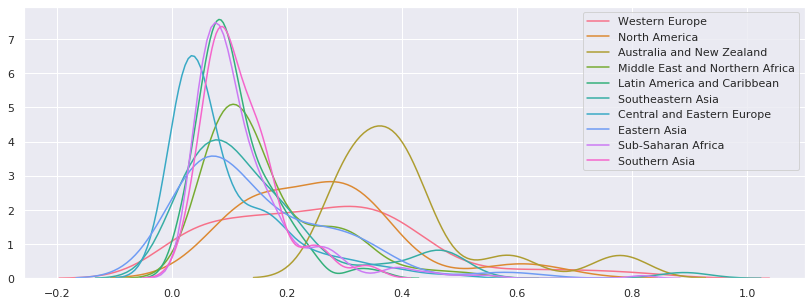

In [39]:
regionDistplot("Trust (Government Corruption)")

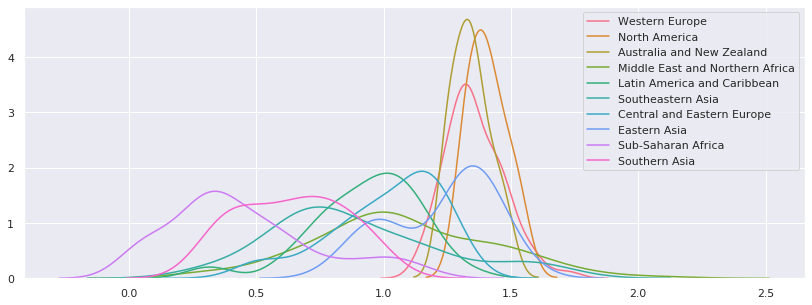

In [40]:
regionDistplot("Economy (GDP per Capita)")

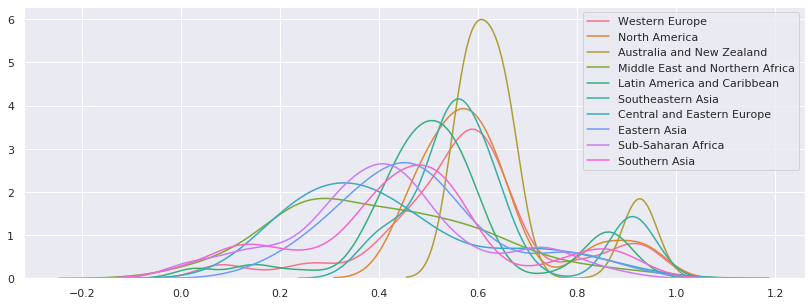

In [41]:
regionDistplot("Freedom")

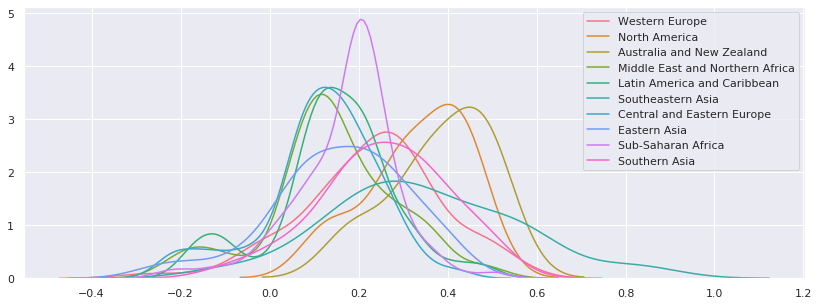

In [42]:
regionDistplot("Generosity")

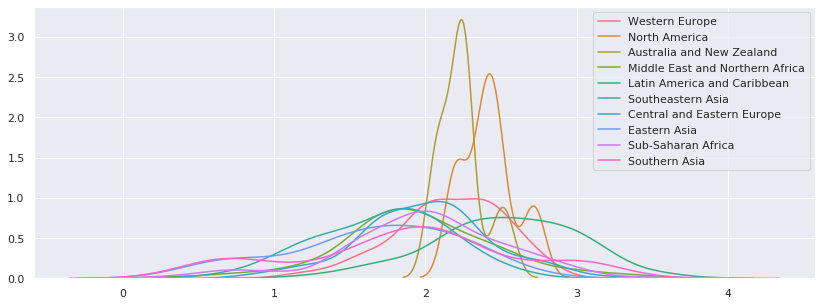

In [43]:
regionDistplot("Dystopia Residual")

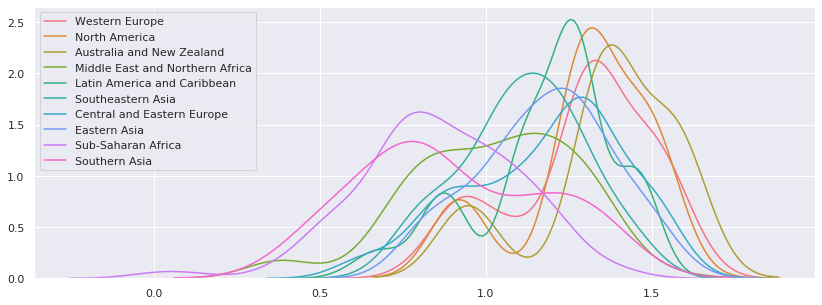

In [44]:
regionDistplot("Social support")

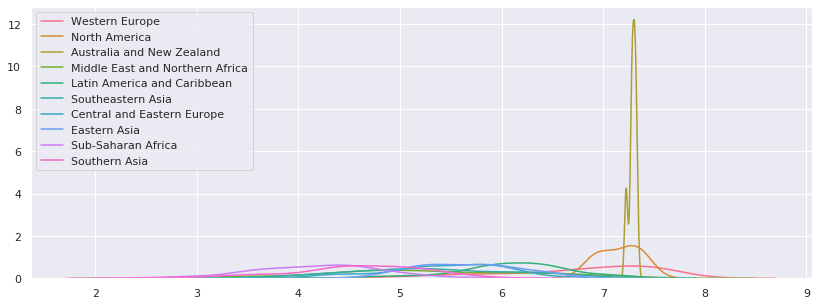

In [45]:
regionDistplot("Happiness Score")

In [46]:
def C_barplot(grupo, columna, largest=True):
    if(largest):
        series = Hg.groupby(grupo)[columna].mean().nlargest(10)
    else:
        series = Hg.groupby(grupo)[columna].mean().nsmallest(10).sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    g = sns.barplot(series, series.index);
    for p in g.patches:
        xy = ((p.get_width(), p.get_y()+.5))
        g.annotate(s=round(p.get_width(),3), xy=xy)
    return g

## Felicidad

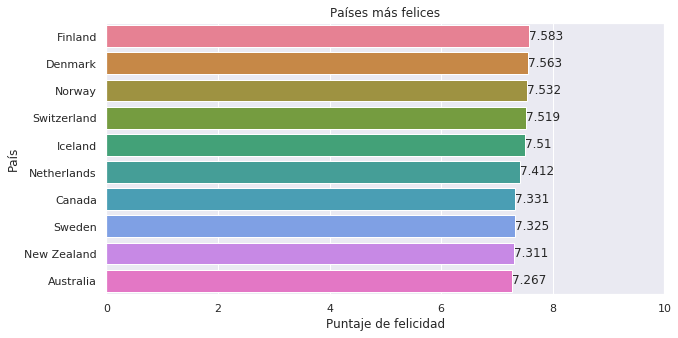

In [47]:
g = C_barplot("Country", "Happiness Score")
g.set_xlim(0,10)
g.set_title("Países más felices")
g.set_xlabel("Puntaje de felicidad")
g.set_ylabel("País");


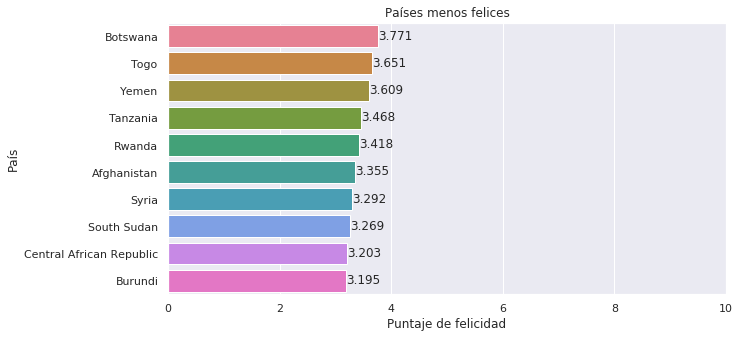

In [48]:
g = C_barplot("Country", "Happiness Score", False)
g.set_xlim(0,10)
g.set_title("Países menos felices")
g.set_xlabel("Puntaje de felicidad")
g.set_ylabel("País");

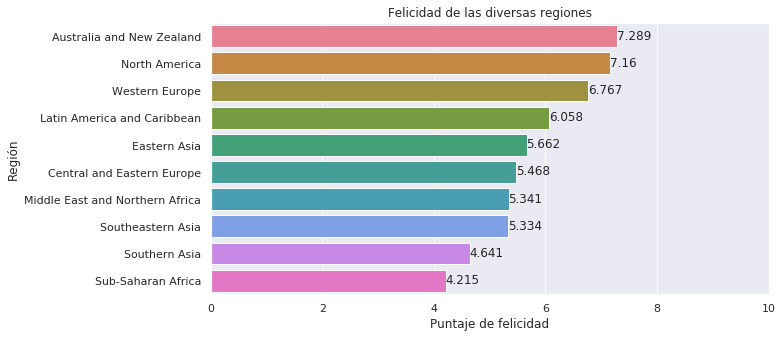

In [49]:
g = C_barplot("Region", "Happiness Score", False)
g.set_xlim(0,10)
g.set_title("Felicidad de las diversas regiones")
g.set_xlabel("Puntaje de felicidad")
g.set_ylabel("Región");

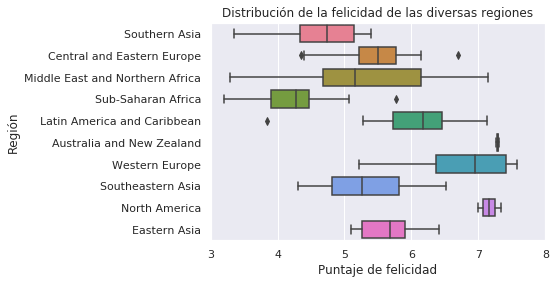

In [220]:
g = sns.boxplot(x="Happiness Score", y="Region", data=Hg);
g.set_xlim(3, 8)
g.set_title("Distribución de la felicidad de las diversas regiones")
g.set_xlabel("Puntaje de felicidad")
g.set_ylabel("Región");

In [51]:
H1 = Happiness[Happiness["Region"].isin(Happiness["Region"].unique()[5:])]
H2 = Happiness[Happiness["Region"].isin(Happiness["Region"].unique()[:5])]

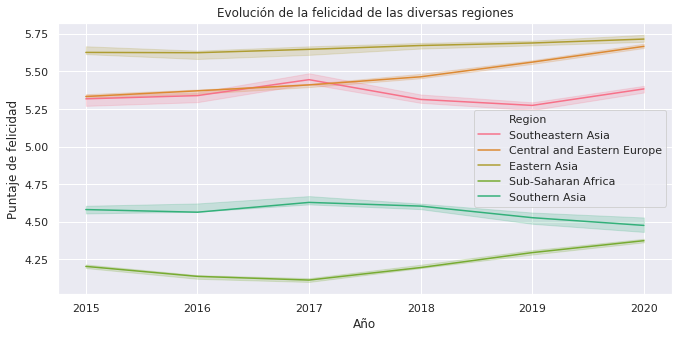

In [222]:
plt.figure(figsize=(11,5))
g = sns.lineplot(x="Year", y="Happiness Score", hue="Region", data=H1, ci=10);
g.set_title("Evolución de la felicidad de las diversas regiones")
g.set_ylabel("Puntaje de felicidad")
g.set_xlabel("Año");

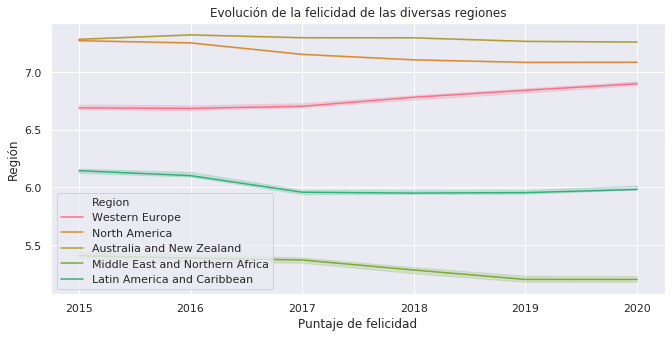

In [224]:
plt.figure(figsize=(11,5))
g = sns.lineplot(x="Year", y="Happiness Score", hue="Region", data=H2, ci=10);
g.set_title("Evolución de la felicidad de las diversas regiones")
g.set_xlabel("Año")
g.set_ylabel("Puntaje");

## Confianza en el gobierno

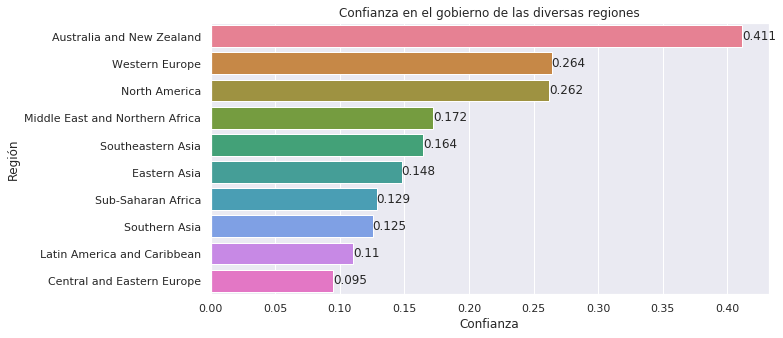

In [225]:
g = C_barplot("Region", "Trust (Government Corruption)")
g.set_title("Confianza en el gobierno de las diversas regiones")
g.set_xlabel("Confianza")
g.set_ylabel("Región");

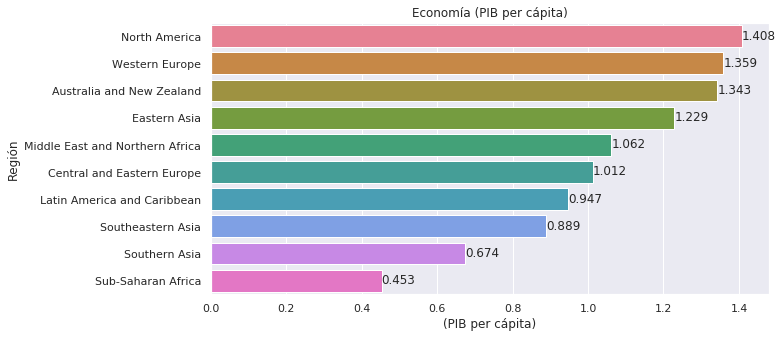

In [228]:
g = C_barplot("Region", "Economy (GDP per Capita)")
g.set_title("Economía (PIB per cápita)")
g.set_xlabel("(PIB per cápita)")
g.set_ylabel("Región");

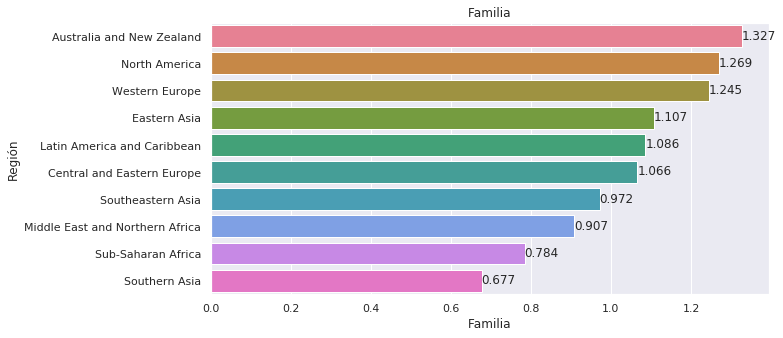

In [229]:
g = C_barplot("Region", "Family")
g.set_title("Familia")
g.set_xlabel("Familia")
g.set_ylabel("Región");

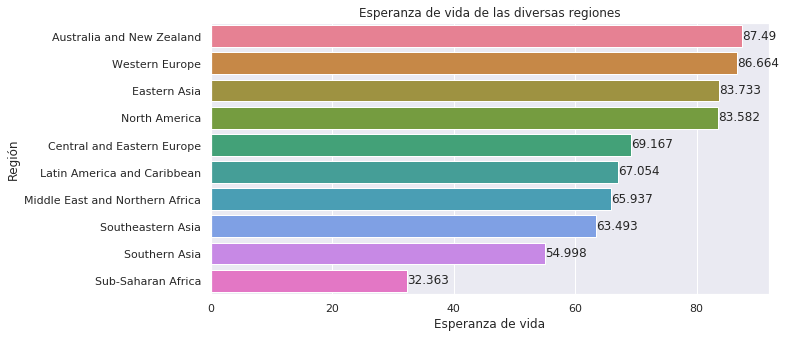

In [234]:
g = C_barplot("Region", "Health (Life Expectancy)");
g.set_title("Esperanza de vida de las diversas regiones")
g.set_xlabel("Esperanza de vida")
g.set_ylabel("Región");

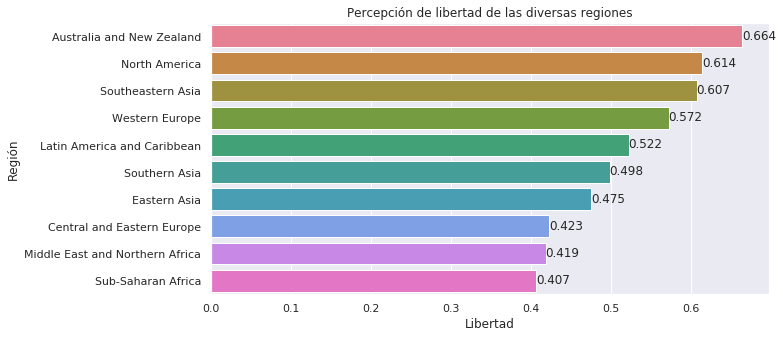

In [235]:
g = C_barplot("Region", "Freedom");
g.set_title("Percepción de libertad de las diversas regiones")
g.set_xlabel("Libertad")
g.set_ylabel("Región");

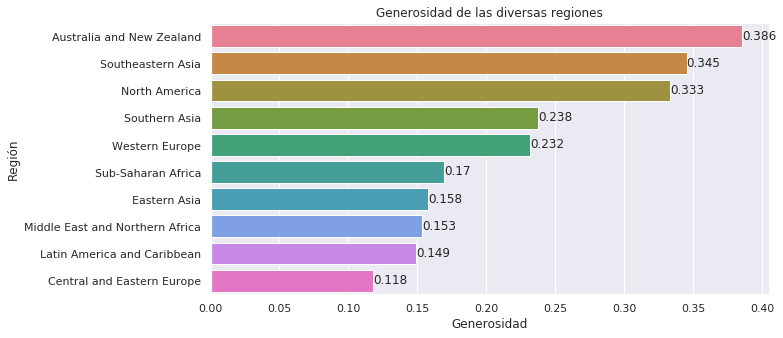

In [236]:
g = C_barplot("Region", "Generosity");
g.set_title("Generosidad de las diversas regiones")
g.set_xlabel("Generosidad")
g.set_ylabel("Región");

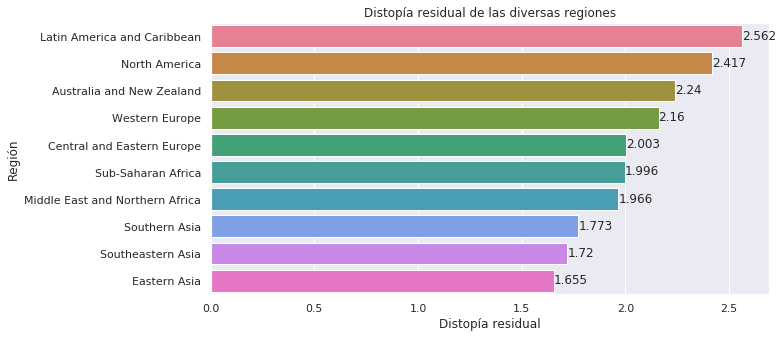

In [237]:
g = C_barplot("Region", "Dystopia Residual");
g.set_title("Distopía residual de las diversas regiones")
g.set_xlabel("Distopía residual")
g.set_ylabel("Región");

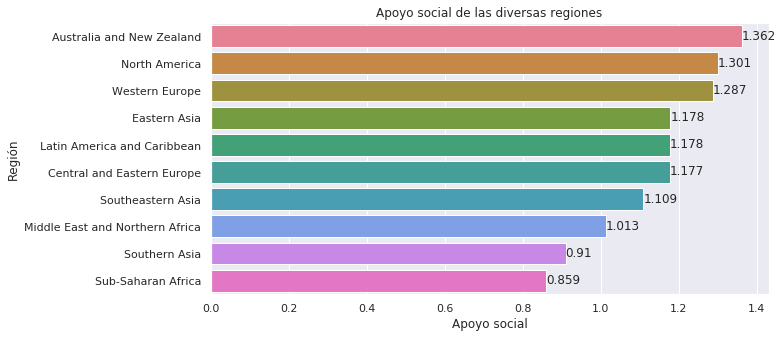

In [238]:
g = C_barplot("Region", "Social support");
g.set_title("Apoyo social de las diversas regiones")
g.set_xlabel("Apoyo social")
g.set_ylabel("Región");

In [62]:
Hpp =  Happiness.drop(["Happiness Rank","Year"], axis=1)

In [84]:
cols = Hn.columns

In [81]:
countries = Happiness["Country"]
Hn = Happiness.drop(["Country", "Region", "Year", "Happiness Rank"], axis=1)
Hn.set_index(countries, inplace=True)
Hn.head()
Hn.shape

(935, 9)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,10))
scaler.fit(Hn)
Ht = scaler.transform(Hn)

In [148]:
countries.reset_index(drop=True, inplace=True)
years = Happiness["Year"].reset_index(drop=True)
regions = Happiness["Region"].reset_index(drop=True)

In [149]:
mmH = pd.DataFrame(Ht, columns=cols)
mmH["Country"] = countries
mmH["Year"] = years
mmH["Region"] = regions

In [176]:
Mexico.drop("Year", axis=1).describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Social support
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,7.850230,5.105909,5.877764,6.632836,5.200590,1.667428,3.149387,8.121770,6.921463
std,0.517101,0.256946,0.980499,0.605890,1.813721,0.639608,1.032332,1.049725,1.006216
min,7.436568,4.868989,4.436927,5.985892,3.867597,0.820026,1.103096,6.717814,5.101371
25%,7.523370,4.903581,5.728062,6.225607,4.285111,1.173238,3.258675,7.434567,6.921463
50%,7.668358,5.028626,5.877764,6.452366,4.676932,1.776671,3.481900,8.121770,6.921463
75%,7.946411,5.266269,5.877764,7.020859,4.934445,2.142978,3.696173,8.946736,7.442045
max,8.813957,5.501831,7.518203,7.546012,8.807292,2.394026,3.877561,9.342043,8.047445


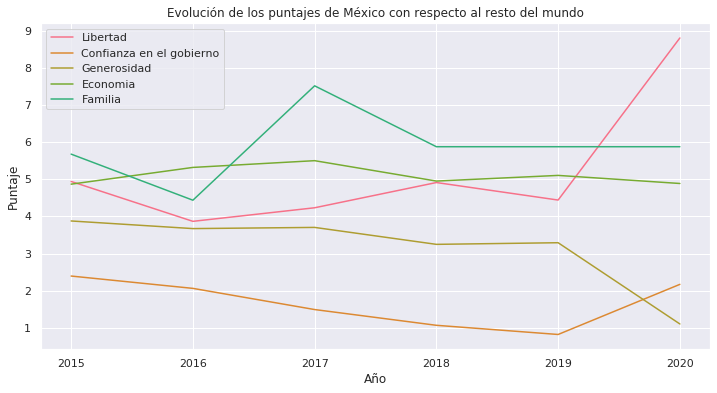

In [240]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Freedom", data=Mexico)
sns.lineplot(x="Year", y="Trust (Government Corruption)", data=Mexico)
sns.lineplot(x="Year", y="Generosity", data=Mexico)
sns.lineplot(x="Year", y="Economy (GDP per Capita)", data=Mexico)
g = sns.lineplot(x="Year", y="Family", data=Mexico)

g.legend(["Libertad","Confianza en el gobierno","Generosidad","Economia","Familia"]);
g.set_xlabel("Año")
g.set_ylabel("Puntaje")
g.set_title("Evolución de los puntajes de México con respecto al resto del mundo");

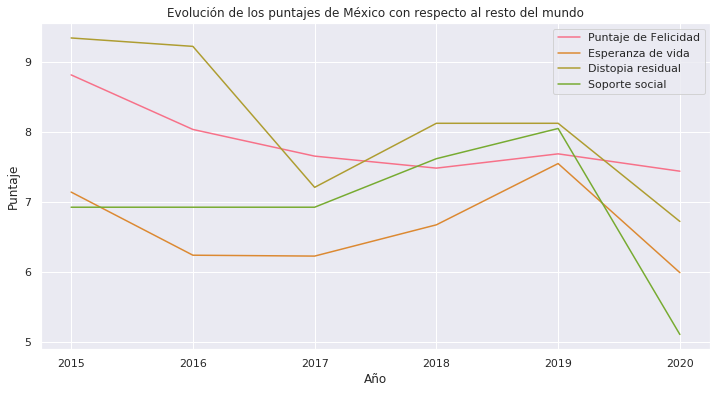

In [241]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Happiness Score", data=Mexico)
sns.lineplot(x="Year", y="Health (Life Expectancy)", data=Mexico)
sns.lineplot(x="Year", y="Dystopia Residual", data=Mexico)
g = sns.lineplot(x="Year", y="Social support", data=Mexico)

g.legend(["Puntaje de Felicidad", "Esperanza de vida", "Distopia residual", "Soporte social"]);
g.set_xlabel("Año")
g.set_ylabel("Puntaje")
g.set_title("Evolución de los puntajes de México con respecto al resto del mundo");

## Correlation

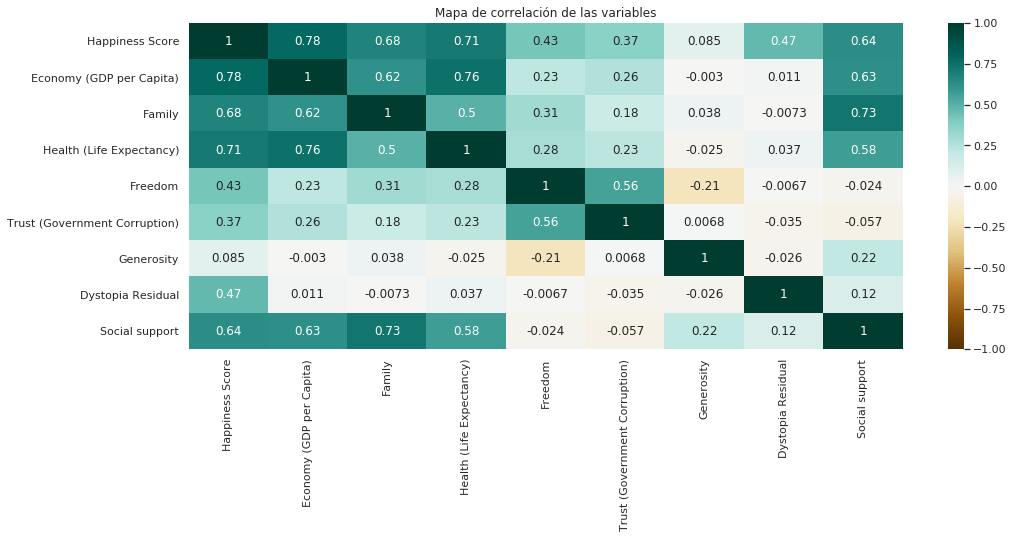

In [243]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(Hpp.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');
g.set_title("Mapa de correlación de las variables");

In [64]:
Hpp.corr()["Happiness Score"]

Happiness Score                  1.000000
Economy (GDP per Capita)         0.784444
Family                           0.676164
Health (Life Expectancy)         0.714038
Freedom                          0.426291
Trust (Government Corruption)    0.374166
Generosity                       0.085172
Dystopia Residual                0.470774
Social support                   0.636859
Name: Happiness Score, dtype: float64

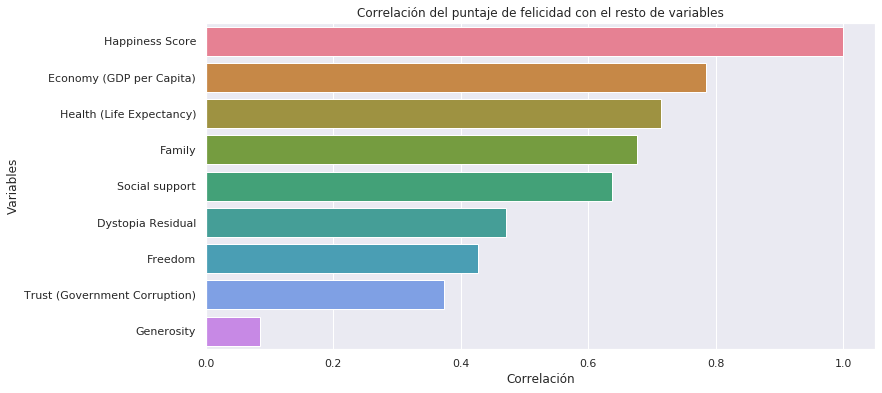

In [245]:
plt.figure(figsize=(12, 6))
HS = Hpp.corr()["Happiness Score"].sort_values(ascending=False)
g = sns.barplot(x=HS, y=HS.index);
g.set_title("Correlación del puntaje de felicidad con el resto de variables")
g.set_xlabel("Correlación")
g.set_ylabel("Variables");